$$S(t)_{T_2 decay} = M_0 e^{-\frac{t}{T_2}}$$

$$T_2^\prime = \frac{1}{\frac{1}{T_2^\star} - \frac{1}{T_2}}$$

$$S(t)_{T_2^\star decay} = M_0 e^{-\frac{t}{T_2^\star}} = M_0 e^{-\frac{t}{T_2}} e^{-\frac{t}{T_2^\prime}}$$

when $ k TE \le t \lt (k + \frac{1}{2}) TE$, 
$$S(t)_{T_2^\star decay} = M_0 e^{-\frac{t}{T_2}} e^{-\frac{t - kTE}{T_2^\prime}}$$
when $ (k + \frac{1}{2}) TE \le t \lt (k + 1) TE$, 
$$S(t)_{T_2^\star decay} = M_0 e^{-\frac{t}{T_2}} e^{\frac{t - (k + 1)TE}{T_2^\prime}}$$

Here, we set $T_2=110ms$, $T_2^\star=66ms$, then $T_2^\prime=165ms$ for Gray Matter in 3T scanner. $TE = 34ms$

## Comparing different trajectories with 4 segments and CAIPI R factor = 4

In [1]:
import os

if os.path.exists('/Users/minhao/Projects/mr-recon/pycode'):
    print('runing on MBP...')
    os.chdir('/Users/minhao/Projects/mr-recon/pycode')
elif os.path.exists('/Users/huminhao/Projects/MRI_basic_image_recon_tutorials/MR_Recon/pycode'):
    print('runing on MBA...')
    os.chdir('/Users/huminhao/Projects/MRI_basic_image_recon_tutorials/MR_Recon/pycode')
elif os.path.exists('/vols/Scratch/minhao/mr-recon/pycode'):
    print('runing on OOD...')
    os.chdir('/vols/Scratch/minhao/mr-recon/pycode')
else:
    print('Can not find scripts')
    exit(1)


runing on MBP...


In [59]:
%load_ext autoreload
%autoreload 2
# %matplotlib inline
# %matplotlib widget 

import pandas as pd
from seq.seq_design import ROInfo


params = [
        # single segment
    dict(
        base_resolution_phase=64, 
        slices_per_slab=32,
        turbo_factor=32,
        epi_factor=64,
        R_total=1,
        Rz=1,
        z_shift=0, 
        order_strategy='JW_CENTRIC',
        TE=39.26,
        method_name='Single-Shot',
        enable_echo_shift=False,
        echo_spacing=0.52,
    ),
    # JW-4 segments
    dict(
        base_resolution_phase=64, 
        slices_per_slab=32,
        turbo_factor=8,
        epi_factor=64,
        R_total=1,
        Rz=1,
        z_shift=0, 
        order_strategy='JW_CENTRIC',
        TE=37.86,
        method_name='Ref-JW',
        enable_echo_shift=False,
        echo_spacing=0.50,
    ),

    # # CAIPI Partition by partition centric subsegment hybride partition and concentrated locations
    # dict(
    #     base_resolution_phase=64, 
    #     slices_per_slab=32,
    #     turbo_factor=8,
    #     epi_factor=64,
    #     R_total=4,
    #     Rz=2,
    #     z_shift=1, 
    #     TE=34,
    #     order_strategy='CAIPI_PBP_CENTRIC_HYBRIDE_CONCENTRATED',
    #     method_name='Traj-1',
    #     enable_echo_shift=False,
    # ),

    # # CAIPI Partition by partition centric subsegment hybride partition and concentrated locations
    # dict(
    #     base_resolution_phase=64, 
    #     slices_per_slab=32,
    #     turbo_factor=32,
    #     epi_factor=16,
    #     R_total=4,
    #     Rz=2,
    #     z_shift=1, 
    #     TE=34/4,
    #     order_strategy='CAIPI_PBP_CENTRIC_HYBRIDE_CONCENTRATED',
    #     method_name='Traj-2',
    #     enable_echo_shift=False,
    # ),

    # # CAIPI Group by Rz
    # dict(
    #     base_resolution_phase=64, 
    #     slices_per_slab=32,
    #     turbo_factor=16,
    #     epi_factor=32,
    #     R_total=4,
    #     Rz=2,
    #     z_shift=1, 
    #     order_strategy='CAIPI_GBRz_CENTRIC',
    #     TE =34/2,
    #     method_name='Traj-3',
    #     enable_echo_shift=False,
    # ),

    # CAIPI Group by Rz
    dict(
        base_resolution_phase=64, 
        slices_per_slab=32,
        turbo_factor=16,
        epi_factor=32,
        R_total=4,
        Rz=2,
        z_shift=1, 
        order_strategy='CAIPI_GBRz_CENTRIC',
        # TE =34/2,
        TE=22.52,
        method_name='Traj-3ES',
        enable_echo_shift=True,
        echo_spacing=0.52,
    ),

    # # CAIPI Group by Rz
    # dict(
    #     base_resolution_phase=64, 
    #     slices_per_slab=32,
    #     turbo_factor=8,
    #     epi_factor=64,
    #     R_total=4,
    #     Rz=4,
    #     z_shift=1, 
    #     order_strategy='CAIPI_GBRz_CENTRIC',
    #     # TE =34,
    #     TE=39.16,
    #     method_name='Traj-4',
    #     enable_echo_shift=False,
    # ),


    # CAIPI Group by Rz
    dict(
        base_resolution_phase=64, 
        slices_per_slab=32,
        turbo_factor=8,
        epi_factor=64,
        R_total=4,
        Rz=4,
        z_shift=2, 
        order_strategy='CAIPI_GBRz_CENTRIC',
        # TE =34,
        TE=39.16,
        method_name='Traj-5',
        enable_echo_shift=False,
        echo_spacing=0.54,
    ),

]

res_dicts = []
psf_on_resonance_dicts = {}
psf_off_resonance_dicts = {}
for param in params:
    myROInfo = ROInfo(base_resolution_phase=param['base_resolution_phase'], 
                        slices_per_slab=param['slices_per_slab'],
                        turbo_factor=param['turbo_factor'],
                        epi_factor=param['epi_factor'],
                        R_total=param['R_total'],
                        Rz=param['Rz'],
                        z_shift=param['z_shift'], 
                        order_strategy=param['order_strategy'],
                        TE=param['TE'],
                        enable_echo_shift=param['enable_echo_shift'],
                        verbose=False,
                        )
    # myROInfo.display_signal_intensity_curve()
    # myROInfo.display_reorder_table(segments_to_plot=[], show_arrows=False, display_segments_separately=False)
    # res_dict, res_df = myROInfo.display_psf(method_name=param['method_name'])
    psf_on_resonance_dicts[param['method_name']] = myROInfo.get_psf(normalized=True, type='on_resonance')
    psf_off_resonance_dicts[param['method_name']] = myROInfo.get_psf(normalized=True, type='off_resonance')

    # display(res_df)
    # res_dicts.append(res_dict)
    # myROInfo.animate_reorder_table()

# merged_res_dict = dict()
# for res_dict in res_dicts:
#     for k, v in res_dict.items():
#         merged_res_dict.setdefault(k, []).extend(v)

# merged_res_df = pd.DataFrame(merged_res_dict)

# for k in [
#     'Effective Resolution z',
#     'Effective Resolution y',
#     'Specificity',
#     'Second Lobe Ratio',
#     'Center Shift',
# ]:
#     merged_res_df[k] = merged_res_df[k].map('{:.4f}'.format)

# merged_res_df.set_index(['Method', 'Type'], inplace=True)
# merged_res_df = merged_res_df.reorder_levels(['Type', 'Method'])
# merged_res_df = merged_res_df.sort_index().T.style.set_table_styles([dict(selector='th', props=[('text-align', 'center')])])
# merged_res_df.set_properties(**{'text-align': 'center'})


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


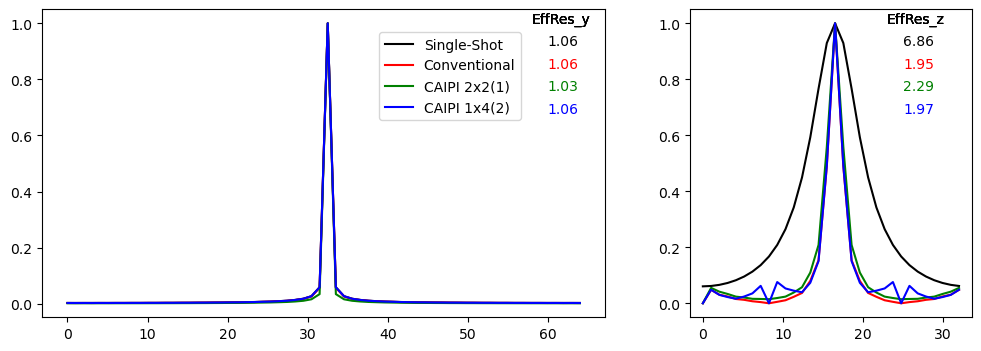

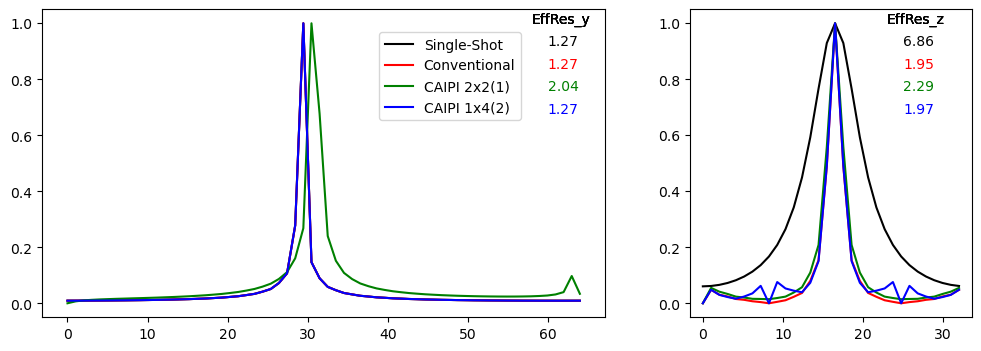

In [60]:
import matplotlib.pyplot as plt
import numpy as np
# fig = plt.figure(figsize=(12, 4))
# fig.suptitle(method_name)
z = np.linspace(0, param['slices_per_slab'], param['slices_per_slab'])
y = np.linspace(0, param['base_resolution_phase'], param['base_resolution_phase'])
y, z = np.meshgrid(y, z)

# ax1 = fig.add_subplot(1, 2, 1)
# ax2 = fig.add_subplot(1, 2, 2)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4), gridspec_kw={'width_ratios': [2, 1]}, sharey=False)

colors = ['k', 'r', 'g', 'b']
names = ['Single-Shot', 'Conventional', 'CAIPI 2x2(1)', 'CAIPI 1x4(2)']
for idx, (name, psf) in enumerate(psf_on_resonance_dicts.items()):
        y_idx = np.argmax(np.max(psf, axis=1))
        z_idx = np.argmax(np.max(psf, axis=0))
        
        

        

        ax1.plot(y[y_idx, :], psf[y_idx, :], label=f'{names[idx]}', color=colors[idx])
        ax2.plot(z[:, z_idx], psf[:, z_idx], label=f'{names[idx]}', color=colors[idx])
        effective_resolution_z, effective_resolution_y, _, _, _ = ROInfo.analyse_psf(psf)
        ax1.text(58, 1, f'EffRes_y', color='k')
        ax1.text(60, 1-0.08*(idx+1), f'{effective_resolution_y:.2f}', color=colors[idx])
        ax2.text(23, 1, f'EffRes_z', color='k')
        ax2.text(25, 1-0.08*(idx+1), f'{effective_resolution_z:.2f}', color=colors[idx])

# ax1.legend()
# ax2.legend()
handles, labels = ax1.get_legend_handles_labels()
f.legend(handles, labels, bbox_to_anchor = (-0.07, -0.16, 0.6, 1))
# plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
plt.show()

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4), gridspec_kw={'width_ratios': [2, 1]}, sharey=False)
for idx, (name, psf) in enumerate(psf_off_resonance_dicts.items()):
        y_idx = np.argmax(np.max(psf, axis=1))
        z_idx = np.argmax(np.max(psf, axis=0))
        
        ax1.plot(y[y_idx, :], psf[y_idx, :], label=f'{names[idx]}', color=colors[idx])
        ax2.plot(z[:, z_idx], psf[:, z_idx], label=f'{names[idx]}', color=colors[idx])
        effective_resolution_z, effective_resolution_y, _, _, _ = ROInfo.analyse_psf(psf)
        ax1.text(58, 1, f'EffRes_y', color='k')
        ax1.text(60, 1-0.08*(idx+1), f'{effective_resolution_y:.2f}', color=colors[idx])
        ax2.text(23, 1, f'EffRes_z', color='k')
        ax2.text(25, 1-0.08*(idx+1), f'{effective_resolution_z:.2f}', color=colors[idx])

# ax1.legend()
# ax2.legend()
handles, labels = ax1.get_legend_handles_labels()
# f.legend(handles, labels, bbox_to_anchor = (0, -0.1, 0.6, 1))
f.legend(handles, labels, bbox_to_anchor = (-0.07, -0.16, 0.6, 1))
# plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
plt.show()


28 16


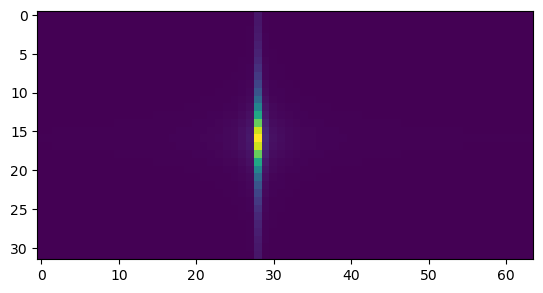

In [58]:
psf = psf_off_resonance_dicts['Single-Shot']
y_idx = np.argmax(np.max(psf, axis=0))
z_idx = np.argmax(np.max(psf, axis=1))
print(y_idx, z_idx)
plt.imshow(psf)
plt.show()

In [20]:
np.argmax(np.max(psf, axis=0))

32

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


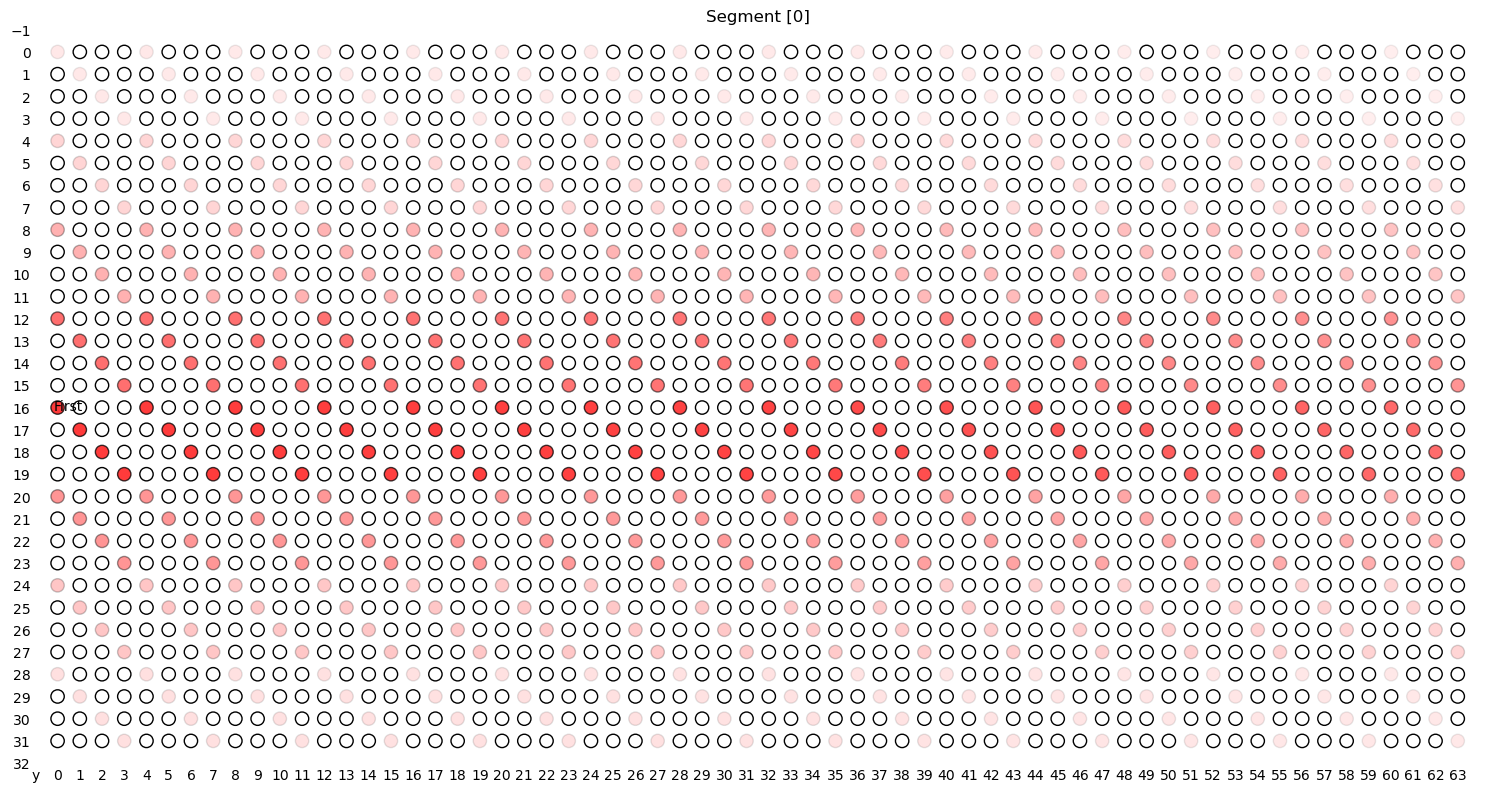

In [4]:
%load_ext autoreload
%autoreload 2
# %matplotlib inline
# %matplotlib widget 

import pandas as pd
from seq.seq_design import ROInfo


params = [
    # # JW-4 segments
    # dict(
    #     base_resolution_phase=64, 
    #     slices_per_slab=32,
    #     turbo_factor=8,
    #     epi_factor=64,
    #     R_total=1,
    #     Rz=1,
    #     z_shift=0, 
    #     order_strategy='JW_CENTRIC',
    #     TE=34,
    #     method_name='Ref-JW',
    #     enable_echo_shift=False,
    # ),

    # # CAIPI Partition by partition centric subsegment hybride partition and concentrated locations
    # dict(
    #     base_resolution_phase=64, 
    #     slices_per_slab=32,
    #     turbo_factor=8,
    #     epi_factor=64,
    #     R_total=4,
    #     Rz=2,
    #     z_shift=1, 
    #     TE=34,
    #     order_strategy='CAIPI_PBP_CENTRIC_HYBRIDE_CONCENTRATED',
    #     method_name='Traj-1',
    #     enable_echo_shift=False,
    # ),

    # # CAIPI Partition by partition centric subsegment hybride partition and concentrated locations
    # dict(
    #     base_resolution_phase=64, 
    #     slices_per_slab=32,
    #     turbo_factor=32,
    #     epi_factor=16,
    #     R_total=4,
    #     Rz=2,
    #     z_shift=1, 
    #     TE=34/4,
    #     order_strategy='CAIPI_PBP_CENTRIC_HYBRIDE_CONCENTRATED',
    #     method_name='Traj-2',
    #     enable_echo_shift=False,
    # ),

    # # CAIPI Group by Rz
    # dict(
    #     base_resolution_phase=64, 
    #     slices_per_slab=32,
    #     turbo_factor=16,
    #     epi_factor=32,
    #     R_total=4,
    #     Rz=2,
    #     z_shift=1, 
    #     order_strategy='CAIPI_GBRz_CENTRIC',
    #     TE =34/2,
    #     method_name='Traj-3',
    #     enable_echo_shift=False,
    # ),

    # # CAIPI Group by Rz
    # dict(
    #     base_resolution_phase=64, 
    #     slices_per_slab=32,
    #     turbo_factor=16,
    #     epi_factor=32,
    #     R_total=4,
    #     Rz=2,
    #     z_shift=1, 
    #     order_strategy='CAIPI_GBRz_CENTRIC',
    #     TE =34/2,
    #     method_name='Traj-3ES',
    #     enable_echo_shift=True,
    # ),

    # CAIPI Group by Rz
    dict(
        base_resolution_phase=64, 
        slices_per_slab=32,
        turbo_factor=8,
        epi_factor=64,
        R_total=4,
        Rz=4,
        z_shift=1, 
        order_strategy='CAIPI_GBRz_CENTRIC',
        TE =34,
        method_name='Traj-4',
        enable_echo_shift=False,
    ),


    # # CAIPI Group by Rz
    # dict(
    #     base_resolution_phase=64, 
    #     slices_per_slab=32,
    #     turbo_factor=8,
    #     epi_factor=64,
    #     R_total=4,
    #     Rz=4,
    #     z_shift=2, 
    #     order_strategy='CAIPI_GBRz_CENTRIC',
    #     TE =34,
    #     method_name='Traj-5',
    #     enable_echo_shift=False,
    # ),

]

res_dicts = []
for param in params:
    myROInfo = ROInfo(base_resolution_phase=param['base_resolution_phase'], 
                        slices_per_slab=param['slices_per_slab'],
                        turbo_factor=param['turbo_factor'],
                        epi_factor=param['epi_factor'],
                        R_total=param['R_total'],
                        Rz=param['Rz'],
                        z_shift=param['z_shift'], 
                        order_strategy=param['order_strategy'],
                        TE=param['TE'],
                        enable_echo_shift=param['enable_echo_shift'],
                        verbose=False,
                        )
    # myROInfo.display_signal_intensity_curve()
    myROInfo.display_reorder_table(segments_to_plot=[0, ], show_arrows=False, display_segments_separately=False)
    # res_dict, res_df = myROInfo.display_psf(method_name=param['method_name'])
    # display(res_df)
    # res_dicts.append(res_dict)
    # myROInfo.animate_reorder_table() 

# merged_res_dict = dict()
# for res_dict in res_dicts:
#     for k, v in res_dict.items():
#         merged_res_dict.setdefault(k, []).extend(v)

# merged_res_df = pd.DataFrame(merged_res_dict)

# for k in [
#     'Effective Resolution z',
#     'Effective Resolution y',
#     'Specificity',
#     'Second Lobe Ratio',
#     'Center Shift',
# ]:
#     merged_res_df[k] = merged_res_df[k].map('{:.4f}'.format)

# merged_res_df.set_index(['Method', 'Type'], inplace=True)
# merged_res_df = merged_res_df.reorder_levels(['Type', 'Method'])
# merged_res_df = merged_res_df.sort_index().T.style.set_table_styles([dict(selector='th', props=[('text-align', 'center')])])
# merged_res_df.set_properties(**{'text-align': 'center'})
